In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from simtk import unit

# Free Particle

The free particle is characterized for having no external potential goberning its motion. In the case of temperature and friction abscence the particle is moving in a uniform rectilineous trajectory. And when temperature and friction are present, we have nothing but a stochastic brownian particle or random walker characterized by magnitudes as diffusion.

## Working with this test system

The python class representing this test system is fully documented in [FreeParticle class API](../api/_autosummary/uibcdf_test_systems.FreeParticle.html). Let's see an example of how to interact with it:

In [2]:
from uibcdf_test_systems import FreeParticle

free_particle = FreeParticle(n_particles = 1, mass = 64 * unit.amu)

The python object has inside the OpenMM system representing this free particle:

In [3]:
free_particle.system

<simtk.openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7f7384556120> >

### Newtonian dynamics

This library has a method to run simple newtonian classical dynamics, with and without damping with OpenMM.

In [5]:
from uibcdf_test_systems.simulation import newtonian

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
initial_velocities[0,0] = 0.10 * unit.nanometers/unit.picoseconds

time, position, velocity, kinetic_energy, potential_energy = newtonian (free_particle.system,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 10 * unit.picoseconds)

We can plot the trajectory of the system along the $X$ axis:

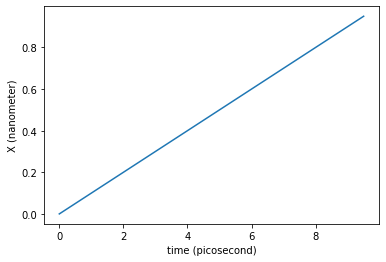

In [8]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

And with external friction:

In [11]:
from uibcdf_test_systems.simulation import newtonian

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
initial_velocities[0,0] = 0.10 * unit.nanometers/unit.picoseconds

time, position, velocity, kinetic_energy, potential_energy = newtonian (free_particle.system,
                                                                        friction = 0.5 / unit.picoseconds,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 10 * unit.picoseconds)

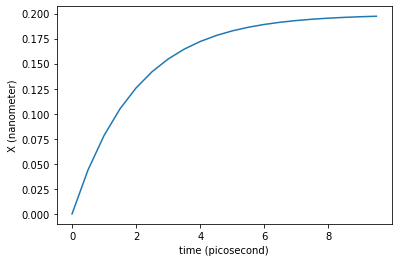

In [12]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

### Langevin NVT run

There is also a method to run simple Langevin NVT runs:

In [13]:
from uibcdf_test_systems.simulation import langevin_NVT

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds

time, position, velocity, kinetic_energy, potential_energy = langevin_NVT (free_particle.system,
                                                                           temperature = 300 * unit.kelvin,
                                                                           friction = 1.0 / unit.picoseconds,
                                                                           initial_positions = initial_positions,
                                                                           initial_velocities = initial_velocities,
                                                                           integration_timestep = 0.02 * unit.picoseconds,
                                                                           saving_timestep = 0.5 * unit.picoseconds,
                                                                           total_time = 0.5 * unit.nanoseconds)

We represent now the stochastic trajectory of our free particle along the axis $X$ in time:

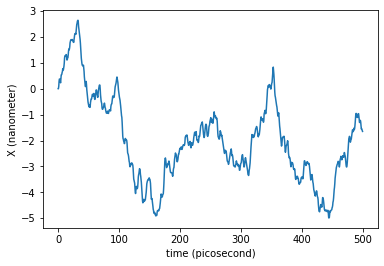

In [14]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

Or over the plane $X,Y$:

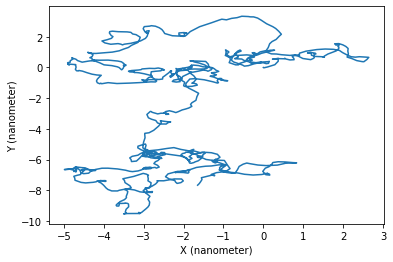

In [16]:
plt.plot(position[:,0,0], position[:,0,1])
plt.xlabel('X ({})'.format(position.unit))
plt.ylabel('Y ({})'.format(position.unit))
plt.show()